In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance as sd
import scipy.io as sio

In [ ]:
def mean_normalize(features):
    # return (features - features.mean()) / features.std()
    return features

In [ ]:
class Kmeans:

    def __init__(self, number_of_clusters, features):
        self.number_of_clusters = number_of_clusters
        self.features = mean_normalize(features)
        self.n = self.features.shape[1]
    
    def random_init_cluster_centroids(self):
        t = self.features
        np.random.shuffle(t)
        return t[:self.number_of_clusters]

    def compute_cluster_assigment(self, cluster_centroids):
        return np.argmin(sd.cdist(cluster_centroids, self.features), axis = 0)

    def compute_new_cluster_centroids(self, cluster_assigment):
        # to-do with-out out-loop numpy
        new_cluster_centroids = np.zeros((self.number_of_clusters, self.n))
        for i in range(self.number_of_clusters):
            new_cluster_centroids[i] = self.features[cluster_assigment == i].mean(axis = 0)
        return new_cluster_centroids

    def fit_iter(self):
        cluster_centroids = self.random_init_cluster_centroids()
        while True:
            cluster_assigment = self.compute_cluster_assigment(cluster_centroids)
            new_cluster_centroids = self.compute_new_cluster_centroids(cluster_assigment)
            if (new_cluster_centroids == cluster_centroids).all:
                break
            
            cluster_centroids = new_cluster_centroids

        return new_cluster_centroids

    def get_distortion(self, cluster_centroids):
        cluster_assigment = self.compute_cluster_assigment(cluster_centroids)
        cluster_sum_distances = np.zeros(self.number_of_clusters)

        for i in range(self.number_of_clusters):
            tmp = self.features[cluster_assigment == i]
            cluster_sum_distances[i] = np.sum(sd.cdist(cluster_centroids[i].reshape(1, self.n), tmp), axis = None)

        return np.sum(cluster_sum_distances, axis = None)

    def fit(self, cnt_iters):
        cluster_centroids = self.fit_iter()
        distortion = self.get_distortion(cluster_centroids)

        min_distortion = distortion
        best_cluster_centroids = cluster_centroids

        for iter in range(cnt_iters):
            cluster_centroids = self.fit_iter()
            distortion = self.get_distortion(cluster_centroids)

            if distortion < min_distortion:
                min_distortion = distortion
                best_cluster_centroids = cluster_centroids

        self.cluster_centroids = best_cluster_centroids
        self.cluster_assigment = self.compute_cluster_assigment(self.cluster_centroids)

    def get_cluster_assigment(self):
        return self.cluster_assigment

    def get_cluster_centroids(self):
        return self.cluster_centroids

Simple data

In [ ]:
x = np.zeros((24, 4))
t = 0
for i in range(3):
    for j in range(4):
        x[t] = [i, j, 10, 15]
        t += 1

for i in range(4):
    for j in range(3):
        x[t] = [i + 10, j + 10, 10, 15]
        t += 1

In [ ]:
km = Kmeans(2, x)
km.fit(cnt_iters = 10)
cluster_centroids = km.get_cluster_centroids()
cluster_assigment = km.get_cluster_assigment()

In [ ]:
print(cluster_centroids)

[[11.5 11.  10.  15. ]
 [ 1.   1.5 10.  15. ]]


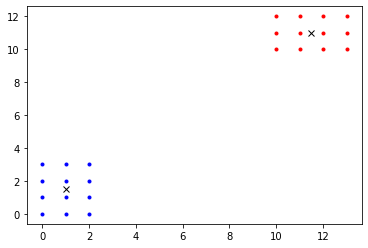

In [ ]:
cluster_zero = x[cluster_assigment == 0]
plt.plot(cluster_zero[:, 0], cluster_zero[:, 1], 'r.')

cluster_one = x[cluster_assigment == 1]
plt.plot(cluster_one[:, 0], cluster_one[:, 1], 'b.')

plt.plot(cluster_centroids[:, 0], cluster_centroids[:, 1], 'kx')
plt.show()

Real data

In [ ]:
data = sio.loadmat('HW_Week8-K-means_data.mat')
x = data['X']

In [ ]:
km = Kmeans(2, x)
km.fit(cnt_iters = 100)
cluster_centroids = km.get_cluster_centroids()
cluster_assigment = km.get_cluster_assigment()

In [ ]:
print(cluster_centroids)

[[2.86434884 4.08286312]
 [4.80385995 5.66897128]]


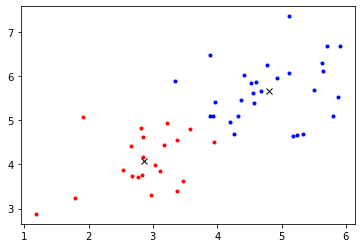

In [ ]:
cluster_zero = x[cluster_assigment == 0]
plt.plot(cluster_zero[:, 0], cluster_zero[:, 1], 'r.')

cluster_one = x[cluster_assigment == 1]
plt.plot(cluster_one[:, 0], cluster_one[:, 1], 'b.')

plt.plot(cluster_centroids[:, 0], cluster_centroids[:, 1], 'kx')
plt.show()